In [115]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import math 
import time
import cmath
from scipy.signal import convolve2d

In [3]:
#question1.1
def lowpass(k,img):
    l=math.floor(k/2)
    m=img.shape[0]
    n=img.shape[1]
    z=np.zeros((m+(2*l),n+(2*l)))
    z[l:l+m,l:l+n]=img


    z=z*(1/(k*k))
    im=np.zeros((m,n))
    for i in range(l,l+m):
        for j in range(l,l+n):
            im[i-l,j-l]=np.sum(z[i-l:i+l+1,j-l:j+l+1])
   
    return np.int_(im)


Rows, Columns, Channels: (240, 320)


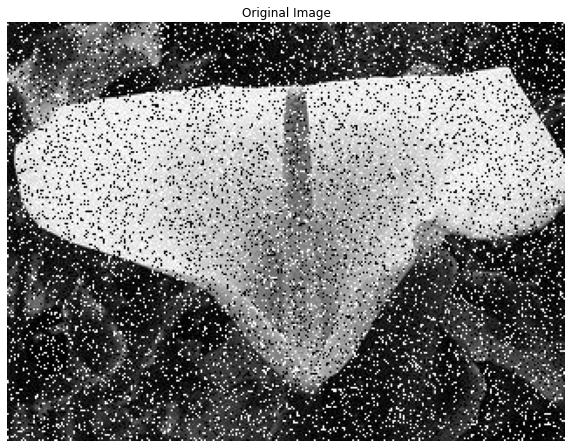

In [4]:
img = cv2.imread('C:/Users/91709/Desktop/DIP/assignment-2-rez39/images/Noisy.jpg',0)
print("Rows, Columns, Channels:",img.shape)
plt.figure(figsize=[10,10])
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.title('Original Image')
plt.show()

[[ 9 10 14 ... 27 21 18]
 [10 12 16 ... 28 21 18]
 [11 13 18 ... 31 25 18]
 ...
 [28 34 39 ... 19 15 14]
 [23 29 34 ... 18 14 13]
 [21 26 29 ... 17 13 13]]


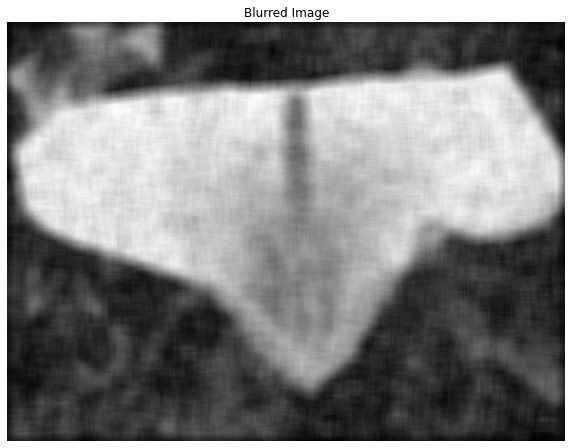

In [5]:
im=lowpass(9,img)
print(im)
plt.figure(figsize=[10,10])
plt.imshow(im,cmap='gray')
plt.axis('off')
plt.title('Blurred Image')
plt.show()

In [6]:
#question1.2
def lowpasseff(k,img):
    m=img.shape[0]
    n=img.shape[1]
    l=math.floor(k/2)
    z=np.zeros((m+(2*l),n+(2*l)))
    z[l:l+m,l:l+n]=img
    z=z*(1/(k*k))
    im=np.zeros((m,n))
    for i in range(l,l+m):
        j=l
        im[i-l,j-l]=z[i-l:i+l+1,j-l:j+l+1].sum()
        for j in range(l+1,l+n):
            im[i-l,j-l]=im[i-l,j-l-1]-z[i-l:i+l,j-l].sum()+z[i-l:i+l,j+l].sum()

    return np.int_(im)


[[ 9 10 14 ... 19 15 15]
 [10 11 15 ... 22 19 18]
 [11 13 17 ... 23 19 19]
 ...
 [28 34 39 ... 15 14 10]
 [23 29 34 ... 14 13  9]
 [21 26 29 ... 13 13  9]]


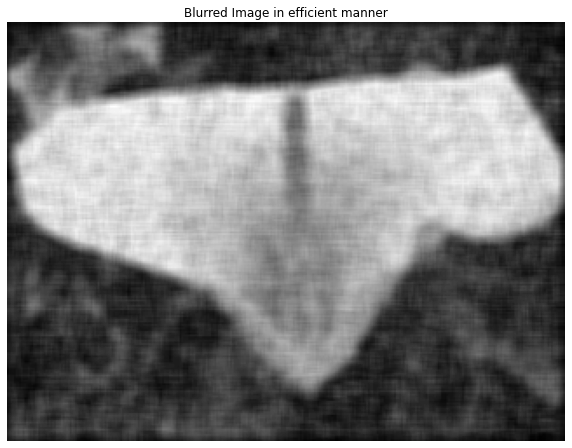

In [7]:
im=lowpasseff(9,img)
print(im)
plt.figure(figsize=[10,10])
plt.imshow(im,cmap='gray')
plt.axis('off')
plt.title('Blurred Image in efficient manner')
plt.show()

In [8]:
#question1.3
#times=np.zeros((13,2))
times1=[]
times2=[]
k=3
i=0
while k<100:
    start = time.time()
    im=lowpasseff(k,img)
    stop = time.time()
    #times[i,0]=stop - start
    times1.append(stop-start)
    start = time.time()
    im=lowpass(k,img)
    stop = time.time()
    #times[i,1]=stop - start 
    times2.append(stop-start)
    k=k+8
    i=i+1
    

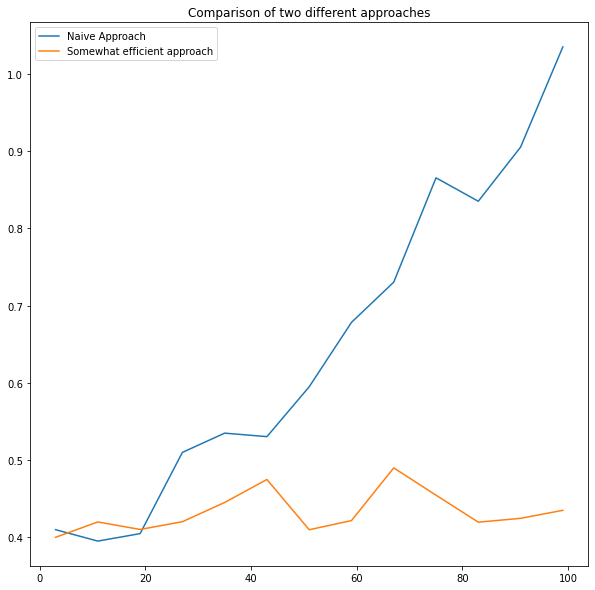

In [9]:
plt.figure(figsize=[10,10])
plt.plot([3,11,19,27,35,43,51,59,67,75,83,91,99],times2,label="Naive Approach")
plt.plot([3,11,19,27,35,43,51,59,67,75,83,91,99],times1,label="Somewhat efficient approach")
plt.title('Comparison of two different approaches')
plt.legend()
plt.show()

In [10]:
#question 1.4 
def med(k,img):
    m=img.shape[0]
    n=img.shape[1]
    l=math.floor(k/2)
    z=np.zeros((m+(2*l),n+(2*l)))
    z[l:l+m,l:l+n]=img
    im=np.zeros((m,n))
    for i in range(l,l+m):
        for j in range(l,l+n):
            im[i-l,j-l]=np.median(z[i-l:i+l+1,j-l:j+l+1],axis=None)
    return np.int_(im)

Rows, Columns, Channels: (240, 320)


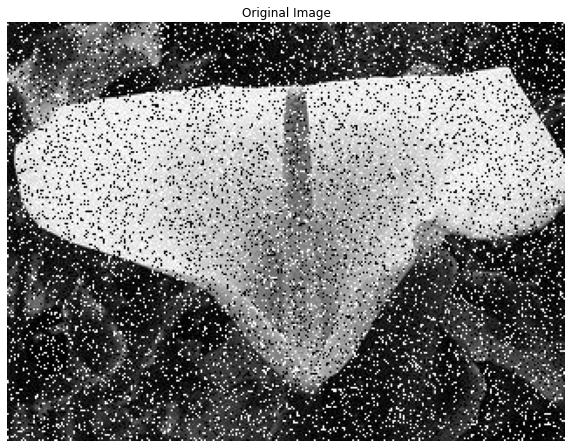

In [11]:
img = cv2.imread('C:/Users/91709/Desktop/DIP/assignment-2-rez39/images/Noisy.jpg',0)
print("Rows, Columns, Channels:",img.shape)
plt.figure(figsize=[10,10])
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.title('Original Image')
plt.show()

[[ 0  0 15 ...  4  0  0]
 [ 0 14 19 ...  9  4  0]
 [14 21 22 ... 12  5  3]
 ...
 [ 3 19 30 ... 17 11  3]
 [ 0 17 23 ... 11  3  0]
 [ 0  0 16 ...  3  0  0]]


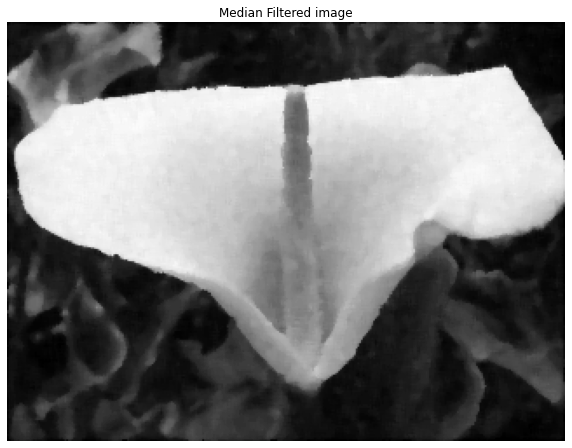

In [12]:
im=med(5,img)
print(im)
plt.figure(figsize=[10,10])
plt.imshow(im,cmap='gray')
plt.axis('off')
plt.title('Median Filtered image')
plt.show()

In [13]:
def medeff(k,img):
    m=img.shape[0]
    n=img.shape[1]
    l=math.floor(k/2)
    z=np.zeros((m+(2*l),n+(2*l)))
    z[l:l+m,l:l+n]=img
    im=np.zeros((m,n))
    for i in range(l,l+m):
        me=np.median(z[i-l:i+1+l,:],axis=0)
        for j in range(l,l+n):
            im[i-l,j-l]=np.median(me[j-l:j+l+1],axis=None)
    return np.int_(im)

[[ 0  9 15 ...  5  4  3]
 [14 15 17 ...  5  5  5]
 [18 22 22 ... 12 12 12]
 ...
 [17 19 23 ... 17 12 11]
 [17 19 21 ... 11 11  1]
 [ 0  2 16 ...  3  0  0]]


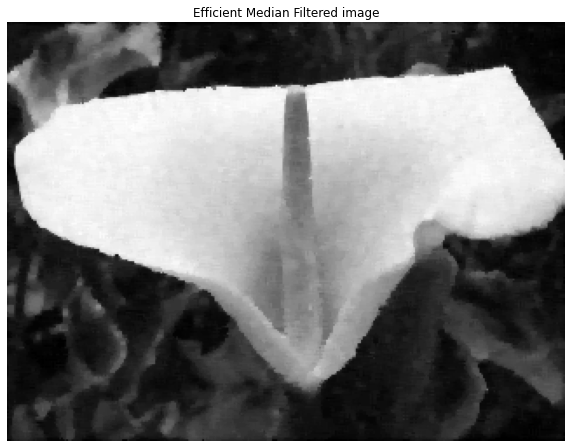

In [14]:
im=medeff(5,img)
print(im)
plt.figure(figsize=[10,10])
plt.imshow(im,cmap='gray')
plt.axis('off')
plt.title('Efficient Median Filtered image')
plt.show()

In [15]:
#question1.4
#times=np.zeros((13,2))
times1=[]
times2=[]
k=3
i=0
while k<100:
    start = time.time()
    im=medeff(k,img)
    stop = time.time()
    #times[i,0]=stop - start
    times1.append(stop-start)
    start = time.time()
    im=med(k,img)
    stop = time.time()
    #times[i,1]=stop - start 
    times2.append(stop-start)
    k=k+8
    i=i+1
    

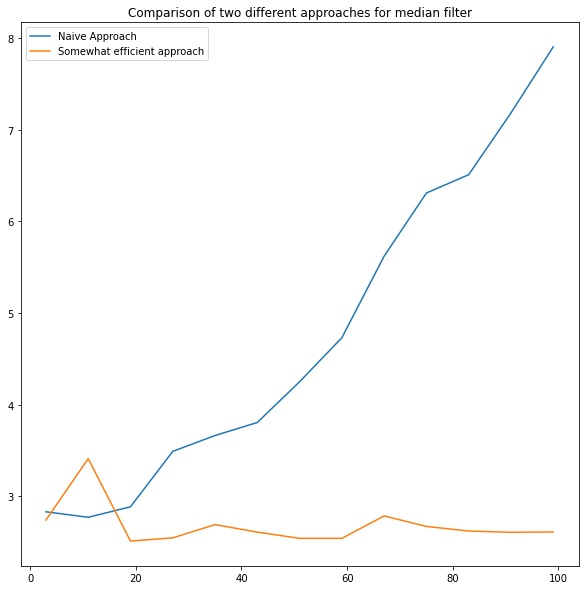

In [16]:
plt.figure(figsize=[10,10])
plt.plot([3,11,19,27,35,43,51,59,67,75,83,91,99],times2,label="Naive Approach")
plt.plot([3,11,19,27,35,43,51,59,67,75,83,91,99],times1,label="Somewhat efficient approach")
plt.title('Comparison of two different approaches for median filter')
plt.legend()
plt.show()

The max and min filter are expected to perform bad in case of both pepper and salt noise present and shown below

In [18]:
#question 1.5
def maxfilter(k,img):
    m=img.shape[0]
    n=img.shape[1]
    l=math.floor(k/2)
    z=np.zeros((m+(2*l),n+(2*l)))
    z[l:l+m,l:l+n]=img
    im=np.zeros((m,n))
    for i in range(l,l+m):
        for j in range(l,l+n):
            im[i-l,j-l]=np.amax(z[i-l:i+l+1,j-l:j+l+1],axis=None)
    return np.int_(im)

[[245 245  33 ... 248 254 254]
 [245 245  35 ... 248 254 254]
 [245 245  35 ... 255 255 255]
 ...
 [255 255 255 ... 249 255 255]
 [255 255 255 ... 249 255 255]
 [255 255  43 ...  29 255 255]]


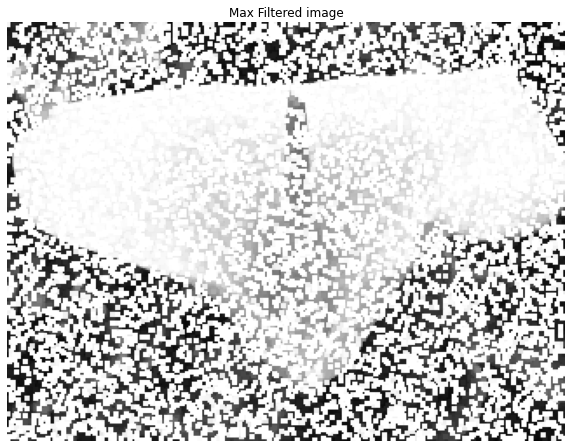

In [19]:
im=maxfilter(3,img)
print(im)
plt.figure(figsize=[10,10])
plt.imshow(im,cmap='gray')
plt.axis('off')
plt.title('Max Filtered image')
plt.show()

In [20]:
#question 1.4
def minfilter(k,img):
    m=img.shape[0]
    n=img.shape[1]
    l=math.floor(k/2)
    z=np.zeros((m+(2*l),n+(2*l)))
    z[l:l+m,l:l+n]=img
    im=np.zeros((m,n))
    for i in range(l,l+m):
        for j in range(l,l+n):
            im[i-l,j-l]=np.amin(z[i-l:i+l+1,j-l:j+l+1],axis=None)
    return np.int_(im)

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  4  3  0]
 [ 0 11  9 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


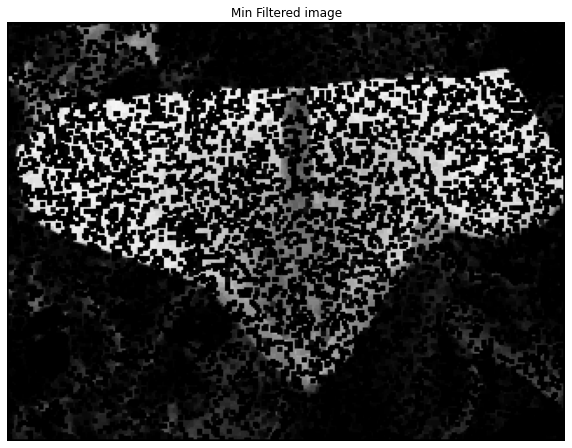

In [21]:
im=minfilter(3,img)
print(im)
plt.figure(figsize=[10,10])
plt.imshow(im,cmap='gray')
plt.axis('off')
plt.title('Min Filtered image')
plt.show()

As the image has both pepper and salt noise median filter works best

[[ 0  0 15 ...  4  0  0]
 [ 0 14 19 ...  9  4  0]
 [14 21 22 ... 12  5  3]
 ...
 [ 3 19 30 ... 17 11  3]
 [ 0 17 23 ... 11  3  0]
 [ 0  0 16 ...  3  0  0]]


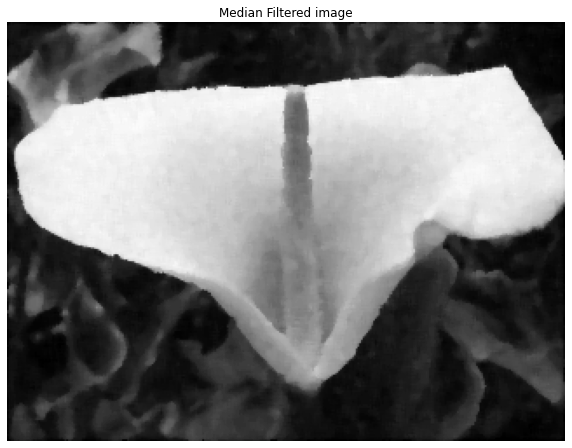

In [22]:
im=med(5,img)
print(im)
plt.figure(figsize=[10,10])
plt.imshow(im,cmap='gray')
plt.axis('off')
plt.title('Median Filtered image')
plt.show()

Rows, Columns, Channels: (512, 343)


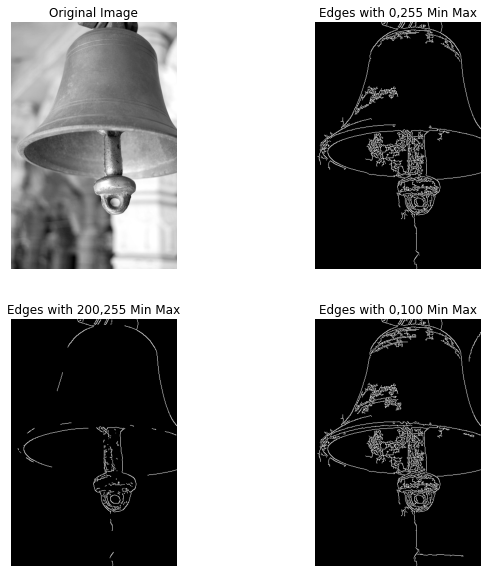

In [23]:
#question 2.1
img = cv2.imread('C:/Users/91709/Desktop/DIP/assignment-2-rez39/images/bell.jpg',0)
print("Rows, Columns, Channels:",img.shape)
plt.figure(figsize=[10,10])
plt.subplot(2,2,1)
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.title('Original Image')
plt.subplot(2,2,2)
plt.imshow(cv2.Canny(img,0,255),cmap='gray')
plt.axis('off')
plt.title('Edges with 0,255 Min Max')
plt.subplot(2,2,3)
plt.imshow(cv2.Canny(img,200,255),cmap='gray')
plt.axis('off')
plt.title('Edges with 200,255 Min Max')
plt.subplot(2,2,4)
plt.imshow(cv2.Canny(img,0,200),cmap='gray')
plt.axis('off')
plt.title('Edges with 0,100 Min Max')
plt.show()

It is estimated that the min threshold depends on 0.66xmean and max threshold 1.33xmean or median dependent

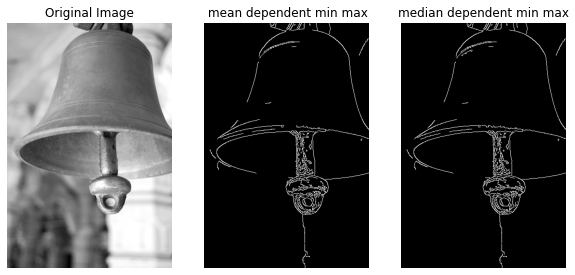

In [24]:
#question 2.2
plt.figure(figsize=[10,20])
plt.subplot(1,3,1)
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.title('Original Image')
plt.subplot(1,3,2)
plt.imshow(cv2.Canny(img,0.66*np.mean(img),1.33*np.mean(img)),cmap='gray')
plt.axis('off')
plt.title(' mean dependent min max')
plt.subplot(1,3,3)
plt.imshow(cv2.Canny(img,0.66*np.median(img,axis=None),1.33*np.median(img,axis=None)),cmap='gray')
plt.axis('off')
plt.title('median dependent min max')
plt.show()

In [25]:
#question 2.3
def prewitt(img):
    m = img.shape[0]
    n = img.shape[1]
    mask_x = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    mask_y = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
    l=1
    z=np.zeros((m+(2*l),n+(2*l)))
    z[l:l+m,l:l+n]=img
    im = np.zeros((m,n))
    im1 = np.zeros((m,n))
    ima = np.zeros((m,n))
    for i in range(l,1+m):
        for j in range(l,1+n):
            im[i-l][j-l] = np.sum(z[i-l:i+l+1,j-l:j+l+1]*mask_x)
            im1[i-l][j-l] = np.sum(z[i-l:i+l+1,j-l:j+1+l]*mask_y)
    ima = np.sqrt(np.power(im,2) + np.power(im1,2))
    return ima

Rows, Columns, Channels: (643, 540)


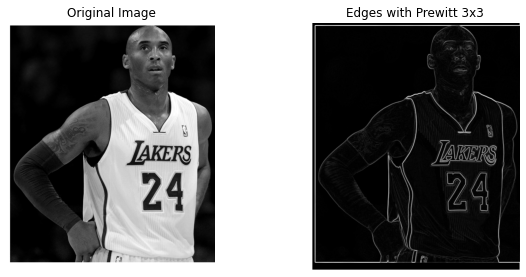

In [26]:
img = cv2.imread('C:/Users/91709/Desktop/DIP/assignment-2-rez39/images/kobe.png',0)
print("Rows, Columns, Channels:",img.shape)
plt.figure(figsize=[10,10])
plt.subplot(2,2,1)
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.title('Original Image')
plt.subplot(2,2,2)
plt.imshow(prewitt(img),cmap='gray')
plt.axis('off')
plt.title('Edges with Prewitt 3x3')
plt.show()

In [27]:
def sobel(img):
    m = img.shape[0]
    n = img.shape[1]
    mask_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    mask_y = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
    l=1
    z=np.zeros((m+(2*l),n+(2*l)))
    z[l:l+m,l:l+n]=img
    im = np.zeros((m,n))
    im1 = np.zeros((m,n))
    ima = np.zeros((m,n))
    for i in range(l,1+m):
        for j in range(l,1+n):
            im[i-l][j-l] = np.sum(z[i-l:i+l+1,j-l:j+l+1]*mask_x)
            im1[i-l][j-l] = np.sum(z[i-l:i+l+1,j-l:j+1+l]*mask_y)
    ima = np.sqrt(np.power(im,2) + np.power(im1,2))
    return ima

Rows, Columns, Channels: (643, 540)


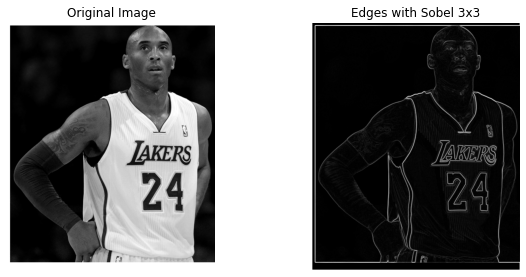

In [28]:
print("Rows, Columns, Channels:",img.shape)
plt.figure(figsize=[10,10])
plt.subplot(2,2,1)
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.title('Original Image')
plt.subplot(2,2,2)
plt.imshow(sobel(img),cmap='gray')
plt.axis('off')
plt.title('Edges with Sobel 3x3')
plt.show()

In [29]:
def roberts(img):
    m = img.shape[0]
    n = img.shape[1]
    mask_x = np.array([[0,1,0],[-1,0,0],[0,0,0]])
    mask_y = np.array([[1,0,0],[0,-1,0],[0,0,0]])
    l=1
    z=np.zeros((m+(2*l),n+(2*l)))
    z[l:l+m,l:l+n]=img
    im = np.zeros((m,n))
    im1 = np.zeros((m,n))
    ima = np.zeros((m,n))
    for i in range(l,1+m):
        for j in range(l,1+n):
            im[i-l][j-l] = np.sum(z[i-l:i+l+1,j-l:j+l+1]*mask_x)
            im1[i-l][j-l] = np.sum(z[i-l:i+l+1,j-l:j+1+l]*mask_y)
    ima = np.sqrt(np.power(im,2) + np.power(im1,2))
    return ima

Rows, Columns, Channels: (643, 540)


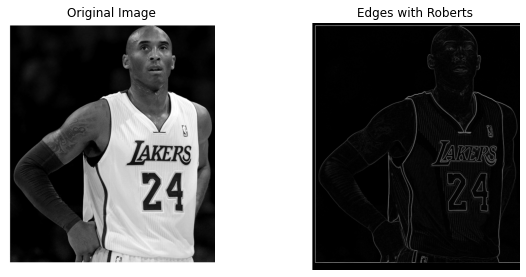

In [30]:
print("Rows, Columns, Channels:",img.shape)
plt.figure(figsize=[10,10])
plt.subplot(2,2,1)
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.title('Original Image')
plt.subplot(2,2,2)
plt.imshow(roberts(img),cmap='gray')
plt.axis('off')
plt.title('Edges with Roberts')
plt.show()

In [31]:

def lap1(img):
    m = img.shape[0]
    n = img.shape[1]
    mask_x = np.array([[0,1,0],[1,-4,1],[0,1,0]])
    #mask_y = np.array([[1,1,1],[1,-8,1],[1,1,1]])
    l=1
    z=np.zeros((m+(2*l),n+(2*l)))
    z[l:l+m,l:l+n]=img
    im = np.zeros((m,n))
    im1 = np.zeros((m,n))
    ima = np.zeros((m,n))
    for i in range(l,1+m):
        for j in range(l,1+n):
            im[i-l][j-l] = np.sum(z[i-l:i+l+1,j-l:j+l+1]*mask_x)
            #im1[i-l][j-l] = np.sum(z[i-l:i+l+1,j-l:j+1+l]*mask_y)
    #ima = np.sqrt(np.power(im,2) + np.power(im1,2))
    return im  

Rows, Columns, Channels: (643, 540)


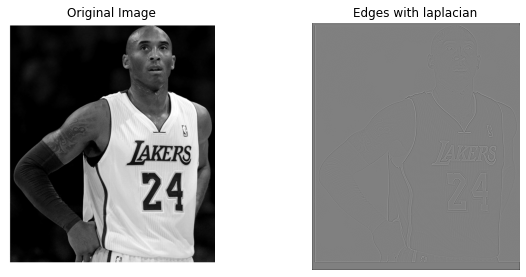

In [32]:
print("Rows, Columns, Channels:",img.shape)
plt.figure(figsize=[10,10])
plt.subplot(2,2,1)
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.title('Original Image')
plt.subplot(2,2,2)
plt.imshow(lap1(img),cmap='gray')
plt.axis('off')
plt.title('Edges with laplacian')
plt.show()

In [33]:

def lap2(img):
    m = img.shape[0]
    n = img.shape[1]
    #mask_x = np.array([[0,1,0],[1,-4,1],[0,1,0]])
    mask_y = np.array([[1,1,1],[1,-8,1],[1,1,1]])
    l=1
    z=np.zeros((m+(2*l),n+(2*l)))
    z[l:l+m,l:l+n]=img
    im = np.zeros((m,n))
    im1 = np.zeros((m,n))
    ima = np.zeros((m,n))
    for i in range(l,1+m):
        for j in range(l,1+n):
            #im[i-l][j-l] = np.sum(z[i-l:i+l+1,j-l:j+l+1]*mask_x)
            im1[i-l][j-l] = np.sum(z[i-l:i+l+1,j-l:j+1+l]*mask_y)
    #ima = np.sqrt(np.power(im,2) + np.power(im1,2))
    return im1  

Rows, Columns, Channels: (643, 540)


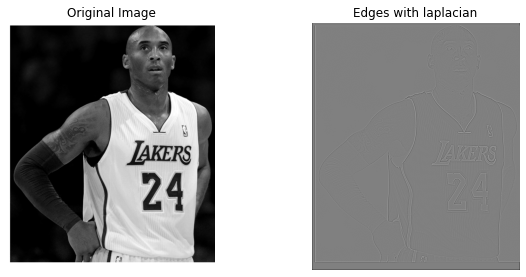

In [34]:
print("Rows, Columns, Channels:",img.shape)
plt.figure(figsize=[10,10])
plt.subplot(2,2,1)
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.title('Original Image')
plt.subplot(2,2,2)
plt.imshow(lap2(img),cmap='gray')
plt.axis('off')
plt.title('Edges with laplacian')
plt.show()

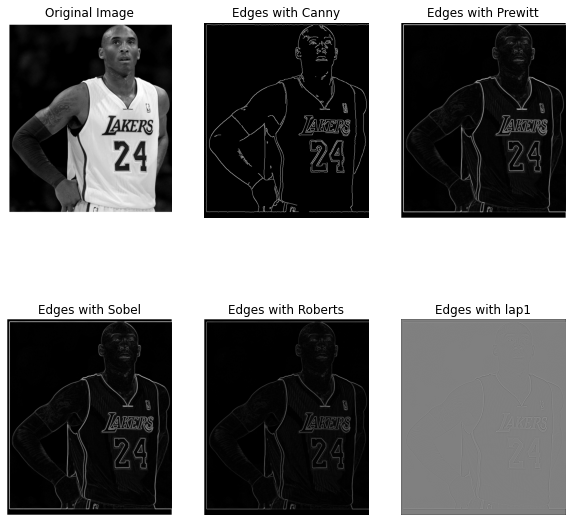

In [35]:
plt.figure(figsize=[10,10])
plt.subplot(2,3,1)
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.title('Original Image')
plt.subplot(2,3,2)
plt.imshow(cv2.Canny(img,127,255),cmap='gray')
plt.axis('off')
plt.title('Edges with Canny')
plt.subplot(2,3,3)
plt.imshow(prewitt(img),cmap='gray')
plt.axis('off')
plt.title('Edges with Prewitt')
plt.subplot(2,3,4)
plt.imshow(sobel(img),cmap='gray')
plt.axis('off')
plt.title('Edges with Sobel')
plt.subplot(2,3,5)
plt.imshow(roberts(img),cmap='gray')
plt.axis('off')
plt.title('Edges with Roberts')
plt.subplot(2,3,6)
plt.imshow(lap1(img),cmap='gray')
plt.axis('off')
plt.title('Edges with lap1')
plt.show()

In [36]:
#question 2.4
def prewitt_5(img):
    m = img.shape[0]
    n = img.shape[1]
    mask_x = np.array([[-1, -2, 0, 2, 1], 
                            [-1, -2, 0, 2, 1], 
                            [-1, -2, 0, 2, 1], 
                            [-1, -2, 0, 2, 1], 
                            [-1, -2, 0, 2, 1]])
    mask_y = np.array([[1, 1, 1, 1, 1],
                            [2, 2, 2, 2, 2],
                            [0, 0, 0, 0, 0],
                            [-2, -2, -2, -2, -2],
                            [-1, -1, -1, -1, -1]])
    l=2
    z=np.zeros((m+(2*l),n+(2*l)))
    z[l:l+m,l:l+n]=img
    im = np.zeros((m,n))
    im1 = np.zeros((m,n))
    ima = np.zeros((m,n))
    for i in range(l,1+m):
        for j in range(l,1+n):
            im[i-l][j-l] = np.sum(z[i-l:i+l+1,j-l:j+l+1]*mask_x)
            im1[i-l][j-l] = np.sum(z[i-l:i+l+1,j-l:j+1+l]*mask_y)
    ima = np.sqrt(np.power(im,2) + np.power(im1,2))
    return ima

In [37]:
def sobel_5(img):
    m = img.shape[0]
    n = img.shape[1]
    mask_x = np.array([[-5, -4, 0, 4, 5], 
                          [-8, -10, 0, 10, 8],
                          [-10, -20, 0, 20, 10], 
                          [-8, -10, 0, 10, 8], 
                          [-5, -4, 0, 4, 5]])
    mask_y = np.array([[-5, -8, -10, -8, -5], 
                          [-4, -10, -20, -10, -4], 
                          [0, 0, 0, 0, 0], 
                          [4, 10, 20, 10, 4], 
                          [5, 8, 10, 8, 5]])
    l=2
    z=np.zeros((m+(2*l),n+(2*l)))
    z[l:l+m,l:l+n]=img
    im = np.zeros((m,n))
    im1 = np.zeros((m,n))
    ima = np.zeros((m,n))
    for i in range(l,1+m):
        for j in range(l,1+n):
            im[i-l][j-l] = np.sum(z[i-l:i+l+1,j-l:j+l+1]*mask_x)
            im1[i-l][j-l] = np.sum(z[i-l:i+l+1,j-l:j+1+l]*mask_y)
    ima = np.sqrt(np.power(im,2) + np.power(im1,2))
    return ima

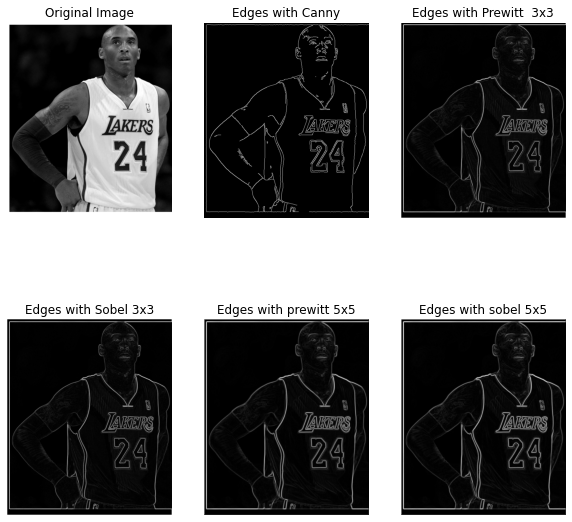

In [38]:
plt.figure(figsize=[10,10])
plt.subplot(2,3,1)
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.title('Original Image')
plt.subplot(2,3,2)
plt.imshow(cv2.Canny(img,127,255),cmap='gray')
plt.axis('off')
plt.title('Edges with Canny')
plt.subplot(2,3,3)
plt.imshow(prewitt(img),cmap='gray')
plt.axis('off')
plt.title('Edges with Prewitt  3x3')
plt.subplot(2,3,4)
plt.imshow(sobel(img),cmap='gray')
plt.axis('off')
plt.title('Edges with Sobel 3x3')
plt.subplot(2,3,5)
plt.imshow(prewitt_5(img),cmap='gray')
plt.axis('off')
plt.title('Edges with prewitt 5x5')
plt.subplot(2,3,6)
plt.imshow(sobel_5(img),cmap='gray')
plt.axis('off')
plt.title('Edges with sobel 5x5')
plt.show()

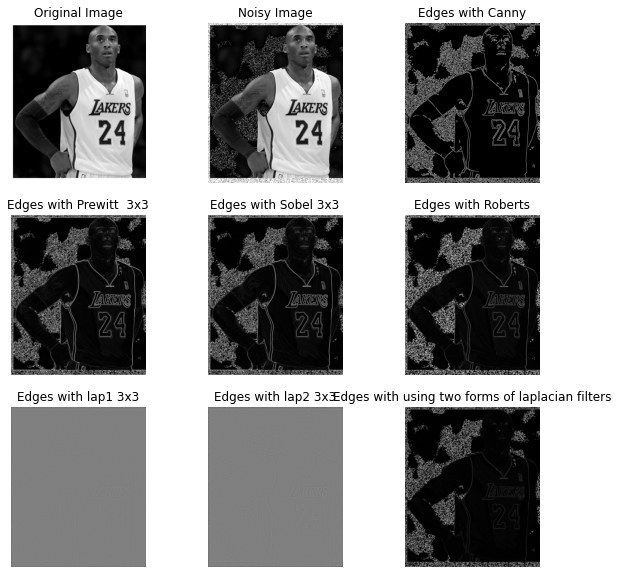

In [39]:
#question 1.5
gaussian = np.random.normal(0, 1, img.shape) 

n_img = img+gaussian
n_img=n_img.astype(np.uint8)
plt.figure(figsize=[10,10])
plt.subplot(3,3,1)
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.title('Original Image')
plt.subplot(3,3,2)
plt.imshow(n_img,cmap='gray')
plt.axis('off')
plt.title('Noisy Image')
plt.subplot(3,3,3)
plt.imshow(cv2.Canny(n_img,127,255),cmap='gray')
plt.axis('off')
plt.title('Edges with Canny')
plt.subplot(3,3,4)
plt.imshow(prewitt(n_img),cmap='gray')
plt.axis('off')
plt.title('Edges with Prewitt  3x3')
plt.subplot(3,3,5)
plt.imshow(sobel(n_img),cmap='gray')
plt.axis('off')
plt.title('Edges with Sobel 3x3')
plt.subplot(3,3,6)
plt.imshow(roberts(n_img),cmap='gray')
plt.axis('off')
plt.title('Edges with Roberts')
plt.subplot(3,3,7)
plt.imshow(lap1(n_img),cmap='gray')
plt.axis('off')
plt.title('Edges with lap1 3x3')
plt.subplot(3,3,8)

plt.imshow(lap2(n_img),cmap='gray')
plt.axis('off')
plt.title('Edges with lap2 3x3')
plt.subplot(3,3,9)

plt.imshow(np.sqrt(np.power(lap1(n_img),2) + np.power(lap2(n_img),2)),cmap='gray')
plt.axis('off')
plt.title('Edges with using two forms of laplacian filters')
plt.show()

Hence, recommended to supress the noise before edge detection

In [40]:
#question 3.1
def distance(x, y, i, j):
    return np.sqrt((x-i)**2 + (y-j)**2)


def gaussian(x, sigma):
    return (1.0 / (2 * math.pi * (sigma ** 2))) * math.exp(- (x ** 2) / (2 * sigma ** 2))
def apply(img, im, x, y, k, sigma_r, sigma_d):
    hl = math.floor(k/2)
    i_filtered = 0
    Wp = 0
    i = 0
    while i < k:
        j = 0
        while j < k:
            neighbour_x = x - (hl - i)
            neighbour_y = y - (hl - j)
            gi = gaussian(img[neighbour_x][neighbour_y] - img[x][y], sigma_r)
            gs = gaussian(distance(neighbour_x, neighbour_y, x, y), sigma_d)
            w = gi * gs
            i_filtered += img[neighbour_x][neighbour_y] * w
            Wp += w
            j += 1
        i += 1
    i_filtered = i_filtered / Wp
    im[x-hl][y-hl] = int(round(i_filtered))


def bilateral_filter(img, k, sigma_r, sigma_d):
    l=math.floor(k/2)
    m = img.shape[0]
    n = img.shape[1]
    z=np.zeros((m+(2*l),n+(2*l)))
    z[l:l+m,l:l+n]=img
    im = np.zeros(img.shape)
    for i in range(l,l+m):
        for j in range(l,l+n):
            apply(z, im, i, j, k, sigma_r, sigma_d)
    return im

Rows, Columns, Channels: (388, 291)


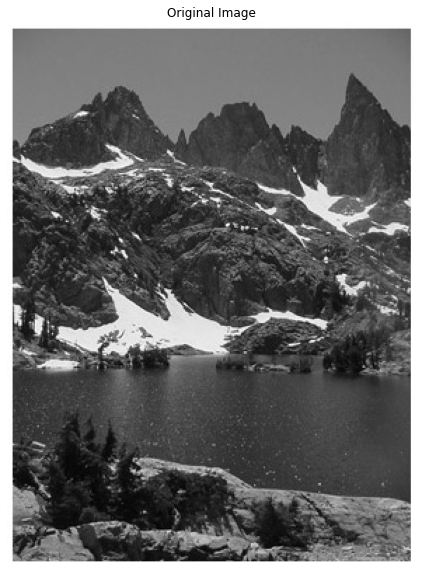

In [41]:
img = cv2.imread('C:/Users/91709/Desktop/DIP/assignment-2-rez39/images/mountain.jpg',0)
print("Rows, Columns, Channels:",img.shape)
plt.figure(figsize=[10,10])
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.title('Original Image')
plt.show()

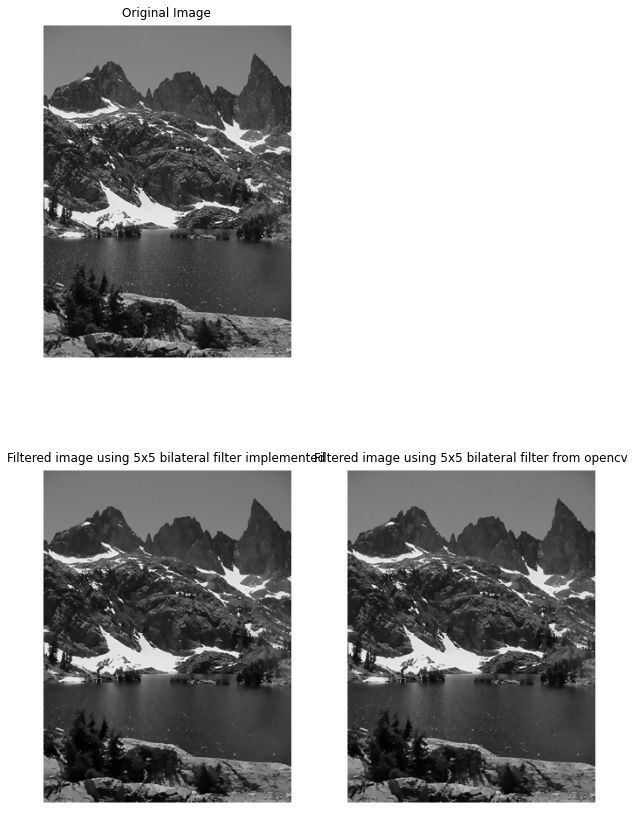

In [42]:
im=bilateral_filter(img,5,12,50)
plt.figure(figsize=[10,15])
plt.subplot(2,2,1)
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.title('Original Image')
plt.subplot(2,2,3)
plt.imshow(im,cmap='gray')
plt.axis('off')
plt.title('Filtered image using 5x5 bilateral filter implemented')
plt.subplot(2,2,4)
plt.imshow(cv2.bilateralFilter(img,5,12,50),cmap='gray')
plt.axis('off')
plt.title('Filtered image using 5x5 bilateral filter from opencv')
plt.show()

In [82]:
#question 3.2
def distance(x, y, i, j):
    return np.sqrt((x-i)**2 + (y-j)**2)


def gaussian(x, sigma):
    return (1.0 / (2 * math.pi * (sigma ** 2))) * math.exp(- (x ** 2) / (2 * sigma ** 2))
def applycbf(img,img1,im, x, y, k, sigma_r, sigma_d):
    hl = math.floor(k/2)
    i_filtered = 0
    Wp = 0
    i = 0
    while i < k:
        j = 0
        while j < k:
            neighbour_x = x - (hl - i)
            neighbour_y = y - (hl - j)
            gi = gaussian(img1[neighbour_x,neighbour_y] - img1[x,y], sigma_r)
            gs = gaussian(distance(neighbour_x, neighbour_y, x, y), sigma_d)
            w = gi * gs
            i_filtered += img[neighbour_x,neighbour_y] * w
            Wp += w
            j += 1
        i += 1
    i_filtered = i_filtered / Wp
    im[x-hl][y-hl] = int(round(i_filtered))


def cbf(img,img1, k, sigma_r, sigma_d):
    l=math.floor(k/2)
    m = img.shape[0]
    n = img.shape[1]
    z=np.zeros((m+(2*l),n+(2*l)))
    z[l:l+m,l:l+n]=img
    z1=np.zeros((m+(2*l),n+(2*l)))
    z1[l:l+m,l:l+n]=img1  
    im = np.zeros((m,n))
    for i in range(l,l+m):
        for j in range(l,l+n):
            applycbf(z,z1, im, i, j, k, sigma_r, sigma_d)
    return im

Rows, Columns, Channels: (388, 291)


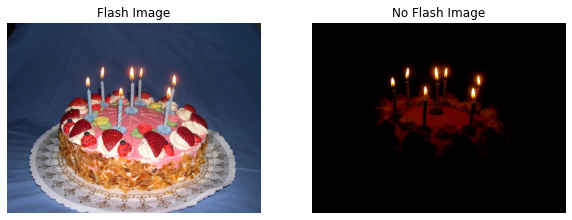

In [44]:
img1 = cv2.cvtColor(cv2.imread('C:/Users/91709/Desktop/DIP/assignment-2-rez39/images/cake_flash.jpg'),cv2.COLOR_BGR2RGB)
print("Rows, Columns, Channels:",img.shape)
plt.figure(figsize=[10,10])
plt.subplot(1,2,1)
plt.imshow(img1)
plt.axis('off')
plt.title('Flash Image')
img = cv2.cvtColor(cv2.imread('C:/Users/91709/Desktop/DIP/assignment-2-rez39/images/cake_noflash.jpg'),cv2.COLOR_BGR2RGB)
plt.subplot(1,2,2)
plt.imshow(img)
plt.axis('off')
plt.title('No Flash Image')
plt.show()

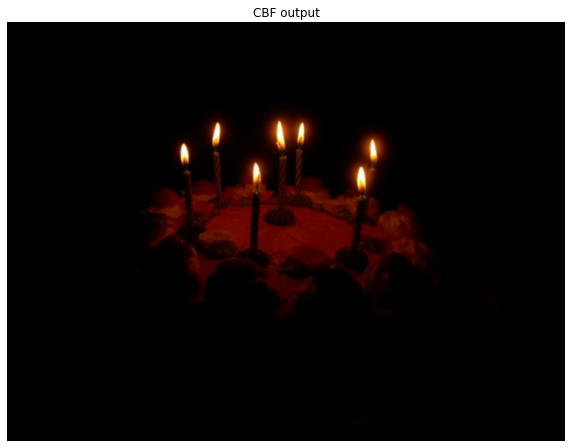

In [86]:
im=np.zeros(img.shape)
for c in range(0,3):
    im[:,:,c]=cbf(img[:,:,c],img1[:,:,c],3,140,150)
plt.figure(figsize=[10,10])
plt.imshow(im.astype(np.uint8))
plt.axis('off')
plt.title('CBF output')
plt.show()

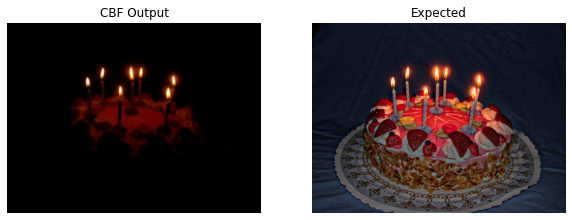

In [85]:
plt.figure(figsize=[10,10])
plt.subplot(1,2,1)
plt.imshow(im.astype(np.uint8))
plt.axis('off')
plt.title('CBF Output')
imgout = cv2.cvtColor(cv2.imread('C:/Users/91709/Desktop/DIP/assignment-2-rez39/images/cake_out.jpg'),cv2.COLOR_BGR2RGB)
plt.subplot(1,2,2)
plt.imshow(imgout)
plt.axis('off')
plt.title('Expected')
plt.show()

Rows, Columns, Channels: (768, 1024, 3)


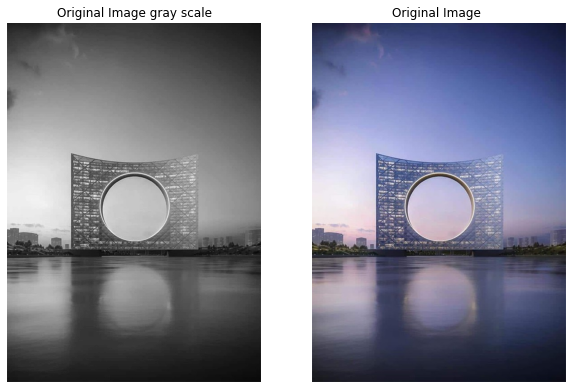

In [61]:
#question 3.1
img_g = cv2.imread('C:/Users/91709/Desktop/DIP/assignment-2-rez39/images/tower.jpg',0)
print("Rows, Columns, Channels:",img.shape)
plt.figure(figsize=[10,10])
plt.subplot(1,2,1)
plt.imshow(img_g,cmap='gray')
plt.axis('off')
plt.title('Original Image gray scale')
img_c = cv2.cvtColor(cv2.imread('C:/Users/91709/Desktop/DIP/assignment-2-rez39/images/tower.jpg'),cv2.COLOR_BGR2RGB)

plt.subplot(1,2,2)
plt.imshow(img_c)
plt.axis('off')
plt.title('Original Image ')
plt.show()

In [62]:
img_c_bf=np.zeros(img_c.shape)
for i in range(0,3):
    img_c_bf[:,:,i]=bilateral_filter(img_c[:,:,i],3,12,50)

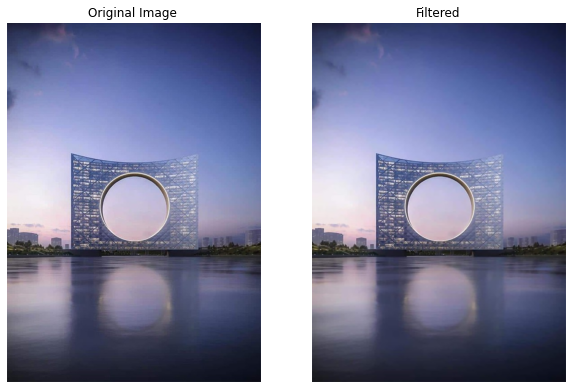

In [63]:
plt.figure(figsize=[10,10])
plt.subplot(1,2,1)
plt.imshow(img_c)
plt.axis('off')
plt.title('Original Image ')

plt.subplot(1,2,2)
plt.imshow(img_c_bf.astype(np.uint8))
plt.axis('off')
plt.title('Filtered')
plt.show()

In [64]:
img_g_blur=medeff(5,img_g)

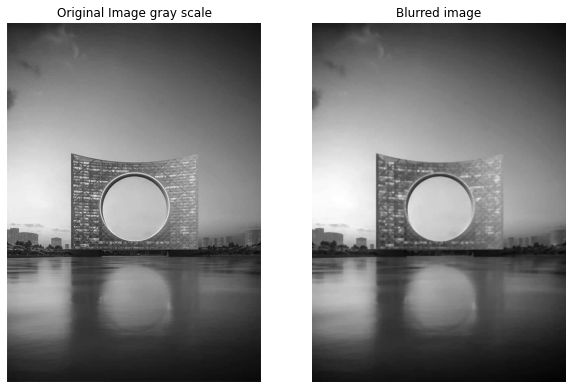

In [65]:
plt.figure(figsize=[10,10])
plt.subplot(1,2,1)
plt.imshow(img_g,cmap='gray')
plt.axis('off')
plt.title('Original Image gray scale')

plt.subplot(1,2,2)
plt.imshow(img_g_blur.astype(np.uint8),cmap='gray')
plt.axis('off')
plt.title('Blurred image')
plt.show()

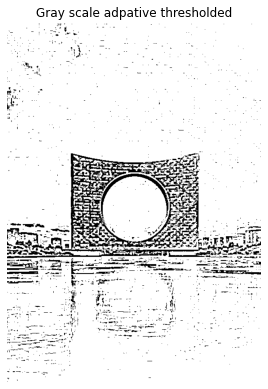

In [70]:
th = cv2.adaptiveThreshold(img_g_blur.astype(np.uint8),255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
plt.figure(figsize=[10,10])
plt.subplot(1,2,1)
plt.imshow(th,cmap='gray')
plt.axis('off')
plt.title('Gray scale adpative thresholded')
plt.show()

In [77]:
cartoon=np.zeros(img_c.shape)
for i in range(0,3):
    cartoon[:,:,i]=np.bitwise_and(img_c_bf.astype(np.uint8)[:,:,i],th)


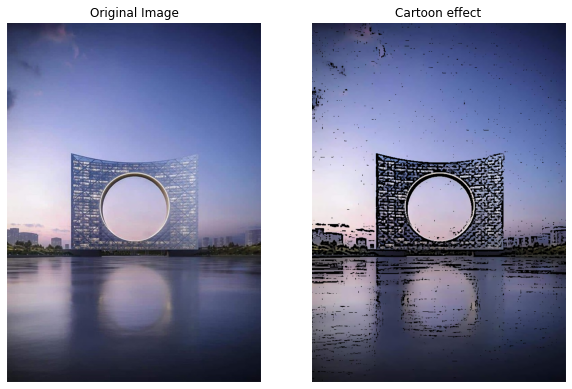

In [81]:
plt.figure(figsize=[10,10])
plt.subplot(1,2,1)
plt.imshow(img_c)
plt.axis('off')
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(cartoon.astype(np.uint8))
plt.axis('off')
plt.title('Cartoon effect')
plt.show()

In [93]:
#question 5.1
def dft(image):
    M, N = image.shape # (img x, img y)
    dft2d = np.zeros((M,N),dtype=complex)
    for k in range(M):
        for l in range(N):
            sum_matrix = 0.0
            for m in range(M):
                for n in range(N):
                    e = cmath.exp(- 2j * np.pi * ((k * m) / M + (l * n) / N))
                    sum_matrix +=  image[m,n] * e
            dft2d[k,l] = sum_matrix
    return dft2d

Rows, Columns, Channels: (16, 128)


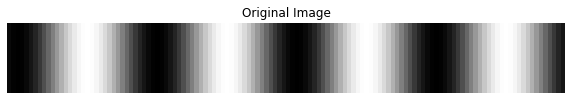

In [94]:
img = cv2.imread('C:/Users/91709/Desktop/DIP/assignment-2-rez39/images/lines.jpg',0)
img=img[0:16,0:128]
print("Rows, Columns, Channels:",img.shape)
plt.figure(figsize=[10,10])
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.title('Original Image')
plt.show()

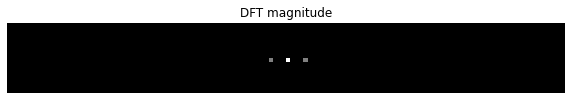

In [95]:
linesdft=dft(img)
plt.figure(figsize=[10,10])
plt.imshow(np.fft.fftshift(abs(linesdft)),cmap='gray')
plt.axis('off')
plt.title('DFT magnitude')
plt.show()

In [96]:
#question 5.2
def fft(s):
    n=int(len(s))
    if n==1:
        return s
    else:
        Feven=fft([s[i] for i in range(0,n,2)])
        Fodd=fft([s[i] for i in range(1,n,2)])
        com=[0]*n
        for m in range(n//2):
            
            com[m]=Feven[m]+cmath.exp((2.0 * cmath.pi * 1j * (-m)) / n)*Fodd[m]
            com[m+n//2]=Feven[m]-cmath.exp((2.0 * cmath.pi * 1j * (-m)) / n)*Fodd[m]
        return com

def fft2d(matrix):
    fftRows = np.array([fft(row) for row in matrix])
    return np.array([fft(row) for row in fftRows.transpose()]).transpose()



    

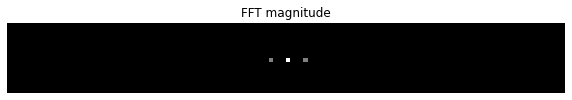

In [97]:
linesfft=fft2d(img)
plt.figure(figsize=[10,10])
plt.imshow(np.fft.fftshift(abs(linesfft)),cmap='gray')
plt.axis('off')
plt.title('FFT magnitude')
plt.show()

In [98]:
#Question 5.2 Comparison
img = cv2.imread('C:/Users/91709/Desktop/DIP/assignment-2-rez39/images/lines.jpg',0)
times1=[]
times2=[]
k=16
i=0
while k<=256:
    im=img[0:10,0:k]
    start = time.time()
    im=dft(im)
    stop = time.time()
    #times[i,0]=stop - start
    times1.append(stop-start)
    start = time.time()
    im=fft2d(im)
    stop = time.time()
    #times[i,1]=stop - start 
    times2.append(stop-start)
    k=k*2
    i=i+1


In [99]:
print("Time taken by DFT")
print(times1)
print("Time taken by FFT")
print(times2)


Time taken by DFT
[0.09097123146057129, 0.2996096611022949, 1.2951622009277344, 4.90522313117981, 16.305073499679565]
Time taken by FFT
[0.0, 0.005121469497680664, 0.009944677352905273, 0.01459813117980957, 0.039823055267333984]


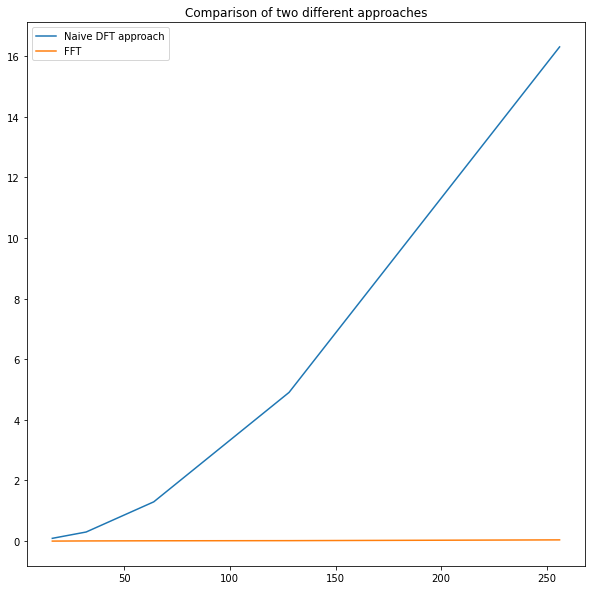

In [100]:
plt.figure(figsize=[10,10])
plt.plot([16,32,64,128,256],times1,label="Naive DFT approach")
plt.plot([16,32,64,128,256],times2,label="FFT")
plt.title('Comparison of two different approaches')
plt.legend()
plt.show()

In [101]:
#Question 5.3

def ifft(fu):
    fx = np.asarray(fu, dtype=complex)
    fu_conjugate = np.conjugate(fu)

    fx = fft(fu_conjugate)

    fx = np.conjugate(fx)
    fx = fx / fu.shape[0]

    return fx

def ifft2d(fu):
    h, w = fu.shape[0], fu.shape[1]

    fx = np.zeros(fu.shape, dtype=complex)

    if len(fu.shape) == 2:
        for i in range(h):
            fx[i, :] = ifft(fu[i, :])

        for i in range(w):
            fx[:, i] = ifft(fx[:, i])

    fx = np.real(fx)
    return fx



    

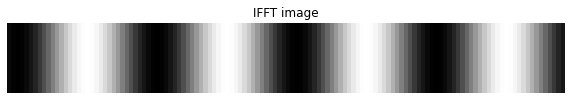

In [102]:
linesifft=ifft2d(linesfft)
plt.figure(figsize=[10,10])
plt.imshow(linesifft,cmap='gray')
plt.axis('off')
plt.title('IFFT image')
plt.show()

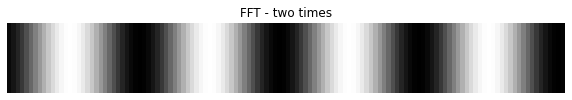

In [103]:
#question 5.4
lines2fft=fft2d(linesfft)
plt.figure(figsize=[10,10])
plt.imshow(lines2fft.real,cmap='gray')
plt.axis('off')
plt.title('FFT - two times')
plt.show()

When we apply the fft twice the image appears to be slightly shifted depending upon the implementation.. I think if we shift the image rotationally in both directions by some amount we would get the same image

Rows, Columns, Channels: (189, 230)


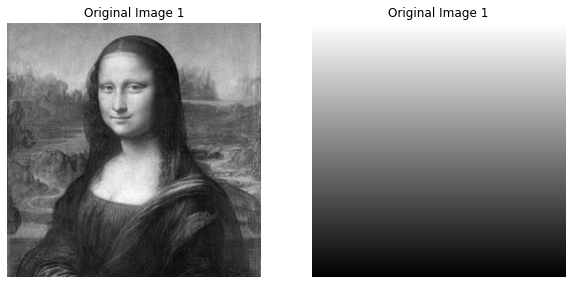

In [118]:
#question 6.1
f = cv2.imread('C:/Users/91709/Desktop/DIP/assignment-2-rez39/images/lisa.jpg',0)
print("Rows, Columns, Channels:",img.shape)
plt.figure(figsize=[10,10])
plt.subplot(1,2,1)
plt.imshow(f,cmap='gray')
plt.axis('off')
plt.title('Original Image 1')
g = cv2.imread('C:/Users/91709/Desktop/DIP/assignment-2-rez39/images/gradient.png',0)

plt.subplot(1,2,2)
plt.imshow(g,cmap='gray')
plt.axis('off')
plt.title('Original Image 1')
plt.show()

In [156]:

def convolve2D(img, kernel):
    kernel = np.flipud(np.fliplr(kernel))
    s=np.sum(kernel)
    m=img.shape[0]
    n=img.shape[1]
    l=math.floor(kernel.shape[0]/2)
    z=np.zeros((m+(2*l),n+(2*l)))
    z[l:l+m,l:l+n]=img
    im=np.zeros(z.shape)
    for i in range(l,l+m):
        for j in range(l,l+n):
            im[i,j]=np.sum(np.multiply(z[i-l:i+l,j-l:j+l],kernel))/s
    

    return im



In [157]:
F=fft2d(f)
G=fft2d(g)
H=np.multiply(F,G)
h=ifft2d(H)
h1=convolve2D(f,g)

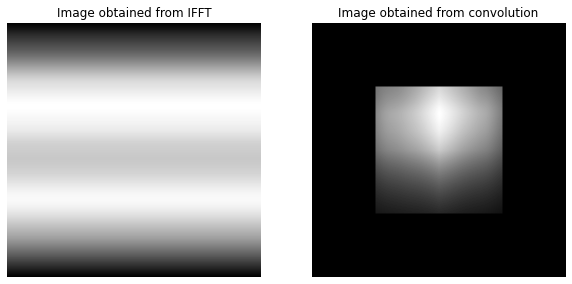

In [158]:
plt.figure(figsize=[10,10])
plt.subplot(1,2,1)
plt.imshow(h,cmap='gray')
plt.axis('off')
plt.title('Image obtained from IFFT')
g = cv2.imread('C:/Users/91709/Desktop/DIP/assignment-2-rez39/images/gradient.png',0)

plt.subplot(1,2,2)
plt.imshow(h1,cmap='gray')
plt.axis('off')
plt.title('Image obtained from convolution')
plt.show()

In [162]:
print('error without zero padding')
print(np.average(np.power(h1[128:128+256,128:128+256]-h,2)))

error without zero padding
5.1363236160702304e+17


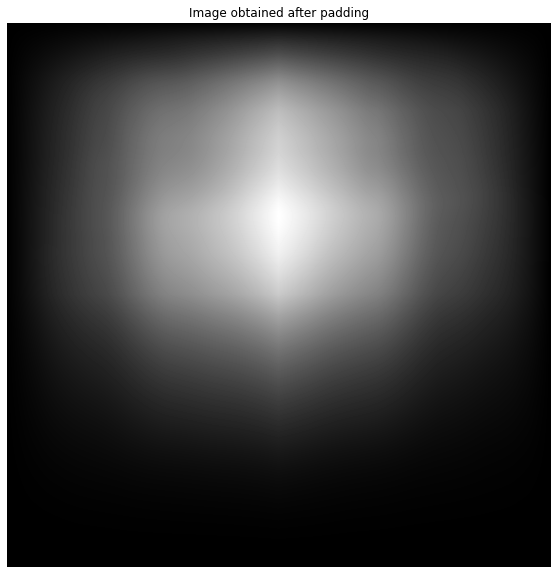

In [186]:
fpad=np.zeros((512,512))
gpad=np.zeros((512,512))
fpad[0:256,0:256]=f
gpad[0:256,0:256]=g
Fpad=fft2d(fpad)
Gpad=fft2d(gpad)
Hpad=np.multiply(Fpad,Gpad)
hpad=ifft2d(Hpad)
plt.figure(figsize=[10,10])
plt.imshow(hpad,cmap='gray')
plt.axis('off')
plt.title('Image obtained after padding')
plt.show()

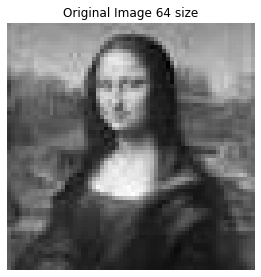

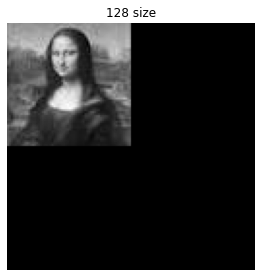

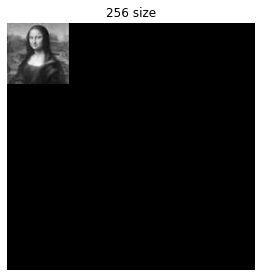

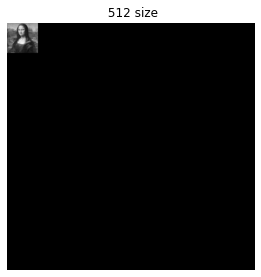

In [198]:
#question 6.1
f64 = cv2.imread('C:/Users/91709/Desktop/DIP/assignment-2-rez39/images/lisa64.jpg',0)
plt.figure(figsize=[10,10])
plt.subplot(2,2,1)
plt.imshow(f64,cmap='gray')
plt.axis('off')
plt.title('Original Image 64 size')
f128=np.zeros((128,128))
f128[0:64,0:64]=f64
plt.figure(figsize=[10,10])
plt.subplot(2,2,2)
plt.imshow(f128,cmap='gray')
plt.axis('off')
plt.title('128 size')
f256=np.zeros((256,256))
f256[0:64,0:64]=f64
plt.figure(figsize=[10,10])
plt.subplot(2,2,3)
plt.imshow(f256,cmap='gray')
plt.axis('off')
plt.title('256 size')
f512=np.zeros((512,512))
f512[0:64,0:64]=f64
plt.figure(figsize=[10,10])
plt.subplot(2,2,4)
plt.imshow(f512,cmap='gray')
plt.axis('off')
plt.title(' 512 size')

plt.show()

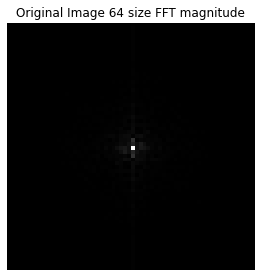

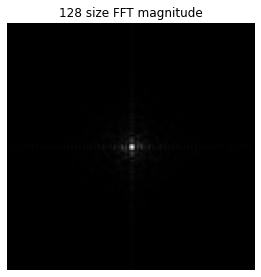

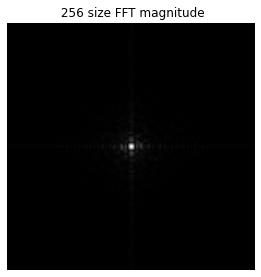

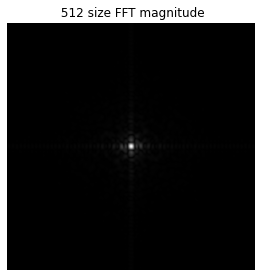

In [199]:
#question 6.2
plt.figure(figsize=[10,10])
plt.subplot(2,2,1)
plt.imshow(np.fft.fftshift(abs(fft2d(f64))),cmap='gray')
plt.axis('off')
plt.title('Original Image 64 size FFT magnitude')
plt.figure(figsize=[10,10])
plt.subplot(2,2,2)
plt.imshow(np.fft.fftshift(abs(fft2d(f128))),cmap='gray')
plt.axis('off')
plt.title('128 size FFT magnitude')
plt.figure(figsize=[10,10])
plt.subplot(2,2,3)
plt.imshow(np.fft.fftshift(abs(fft2d(f256))),cmap='gray')
plt.axis('off')
plt.title(' 256 size FFT magnitude')
plt.figure(figsize=[10,10])
plt.subplot(2,2,4)
plt.imshow(np.fft.fftshift(abs(fft2d(f512))),cmap='gray')
plt.axis('off')
plt.title(' 512 size FFT magnitude')

plt.show()

The magnitude spectrum initially concetrated near DC or zero frequency starts spreading as we add padding. Zero padding allows one to use a longer FFT, which will produce a longer FFT result vector.

A longer FFT result has more frequency bins that are more closely spaced in frequency. But they will be essentially providing the same result as a high quality Sinc interpolation of a shorter non-zero-padded FFT of the original data.

This might result in a smoother looking spectrum when plotted without further interpolation. 
So basically zero padding in image domain helps to increase the resolution bits in the freuqency.
Increase the number of FFT points beyond your time-domain signal length (zero padding) if you would like to see better definition of the FFT bins, though it doesn't buy you any more true resolution. You can also pad to get to a power of 2 number of FFT points.

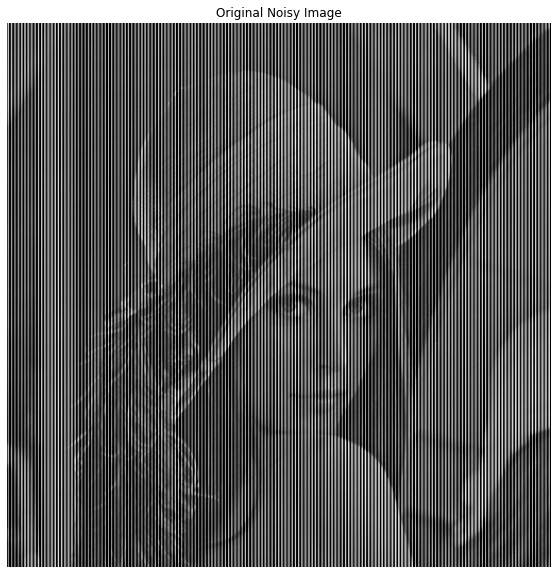

In [202]:
n = cv2.imread('C:/Users/91709/Desktop/DIP/assignment-2-rez39/images/noisy_lena.png',0)
plt.figure(figsize=[10,10])
plt.imshow(n,cmap='gray')
plt.axis('off')
plt.title('Original Noisy Image')
plt.show()

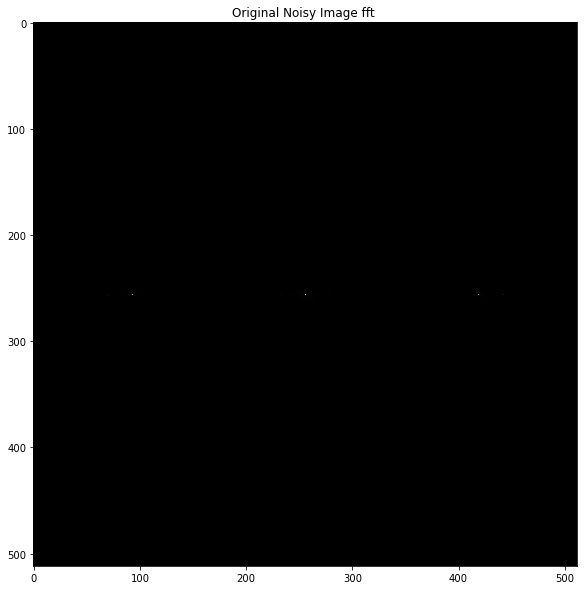

In [258]:
nfft=fft2d(n)
plt.figure(figsize=[10,10])
plt.imshow(np.fft.fftshift(abs(nfft)),cmap='gray')
plt.title('Original Noisy Image fft ')
plt.show()

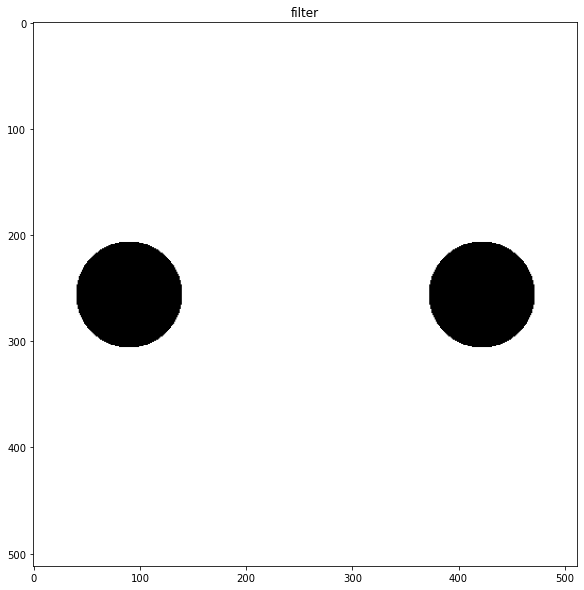

In [490]:
shape = nfft.shape

def draw_cicle(shape,diamiter,center):
    assert len(shape) == 2
    TF = np.zeros(shape,dtype=np.bool)

    for iy in range(shape[0]):
        for ix in range(shape[1]):
            TF[iy,ix] = (iy- center[0])**2 + (ix - center[1])**2 < diamiter **2 or (iy- center[0])**2 + (ix - 512+center[1])**2 < diamiter **2 

    return(TF)


TFcircleIN   = ~draw_cicle(shape,diamiter=50,center=(256,90))


fig = plt.figure(figsize=(30,10))
ax  = fig.add_subplot(1,2,1)
im  = ax.imshow(TFcircleIN,cmap="gray")
plt.title('filter')
plt.show()

In [491]:
def filter_circle(TFcircleIN,fft_img):
    temp = np.zeros(fft_img.shape,dtype=complex)
    temp[TFcircleIN] = fft_img[TFcircleIN]
    return(temp)
temp = filter_circle(TFcircleIN,np.fft.fftshift(nfft))

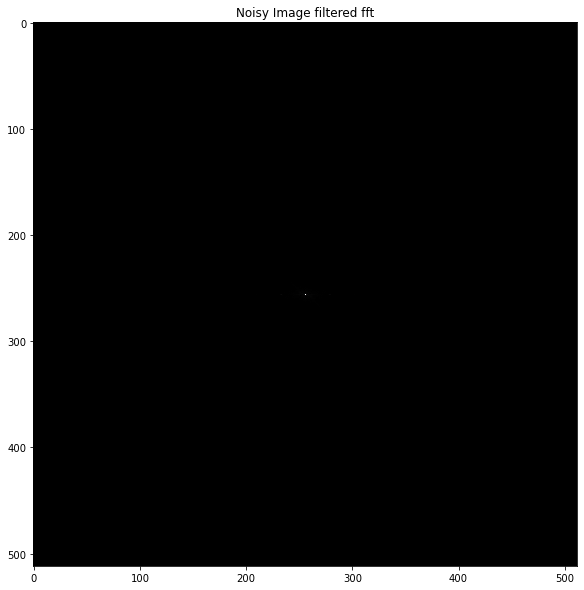

In [492]:
plt.figure(figsize=[10,10])
plt.imshow(abs(temp),cmap='gray')
plt.title('Noisy Image filtered fft')
plt.show()

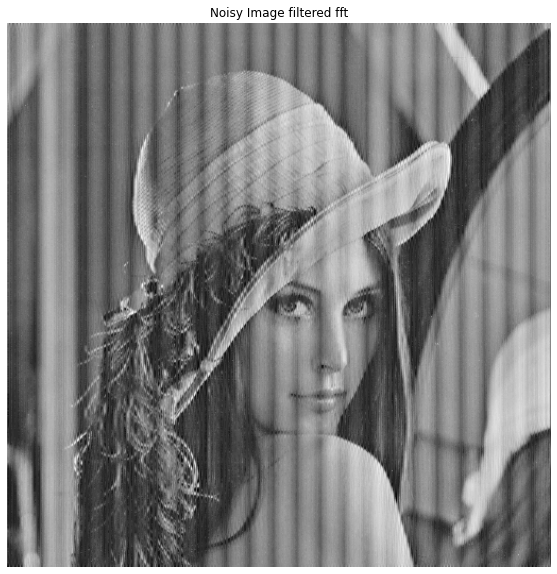

In [493]:
filteredlena=ifft2d(np.fft.fftshift(temp))
plt.figure(figsize=[10,10])
plt.imshow(filteredlena,cmap='gray')
plt.axis('off')
plt.title('Noisy Image filtered fft')
plt.show()

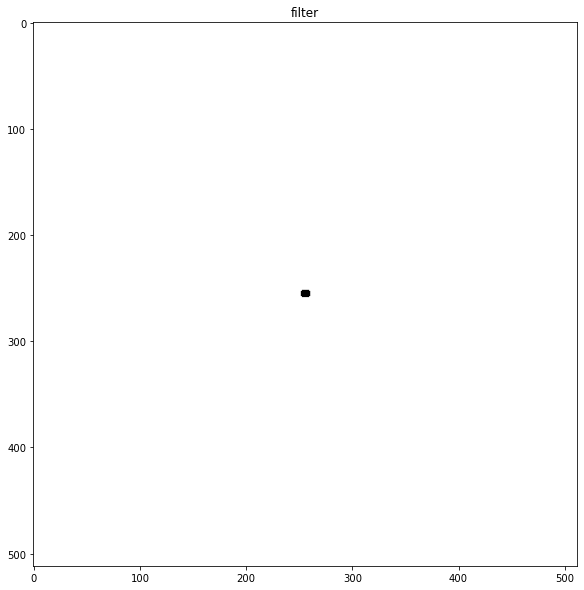

In [494]:
TFcircleIN   = ~draw_cicle(shape,diamiter=4,center=(255,255))


fig = plt.figure(figsize=(30,10))
ax  = fig.add_subplot(1,2,1)
im  = ax.imshow(TFcircleIN,cmap="gray")
plt.title('filter')
plt.show()

In [495]:
def filter_circle(TFcircleIN,fft_img):
    temp = np.zeros(fft_img.shape,dtype=complex)
    temp[TFcircleIN] = fft_img[TFcircleIN]
    return(temp)
temp2 = filter_circle(TFcircleIN,temp)

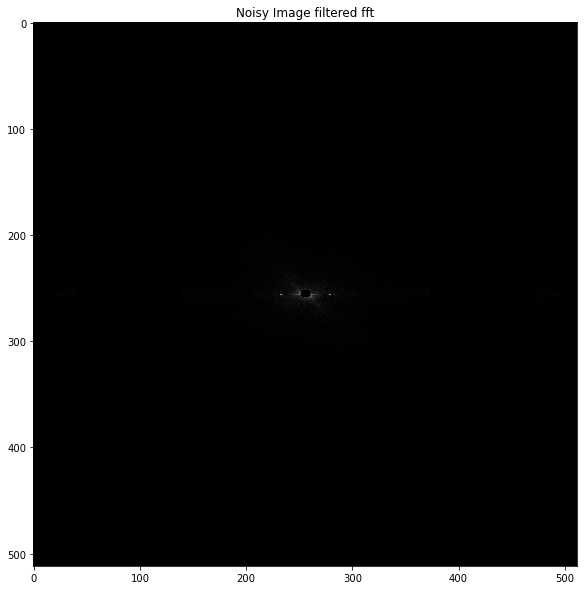

In [496]:
plt.figure(figsize=[10,10])
plt.imshow(abs(temp2),cmap='gray')
plt.title('Noisy Image filtered fft')
plt.show()

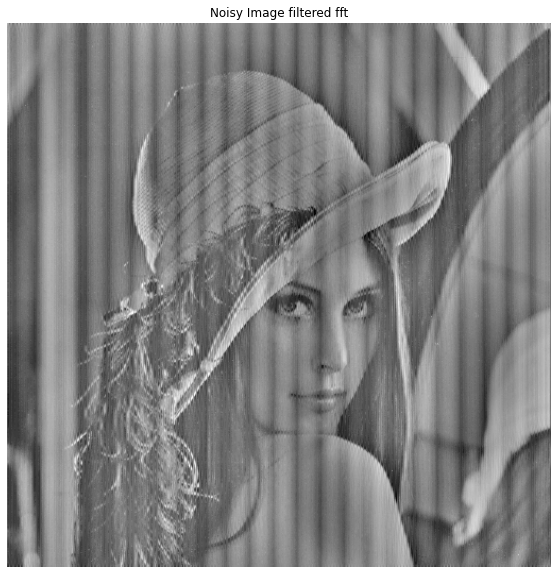

In [497]:
filteredlena=ifft2d(np.fft.fftshift(temp2))
plt.figure(figsize=[10,10])
plt.imshow(filteredlena,cmap='gray')
plt.axis('off')
plt.title('Noisy Image filtered fft')
plt.show()

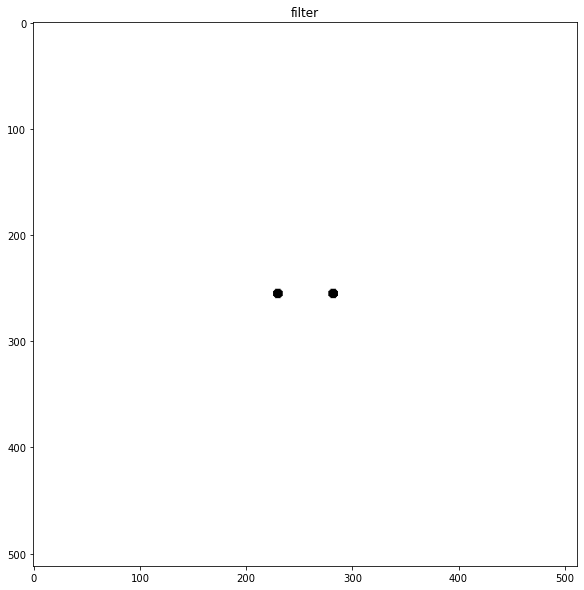

In [509]:
TFcircleIN   = ~draw_cicle(shape,diamiter=5,center=(255,230))


fig = plt.figure(figsize=(30,10))
ax  = fig.add_subplot(1,2,1)
im  = ax.imshow(TFcircleIN,cmap="gray")
plt.title('filter')
plt.show()

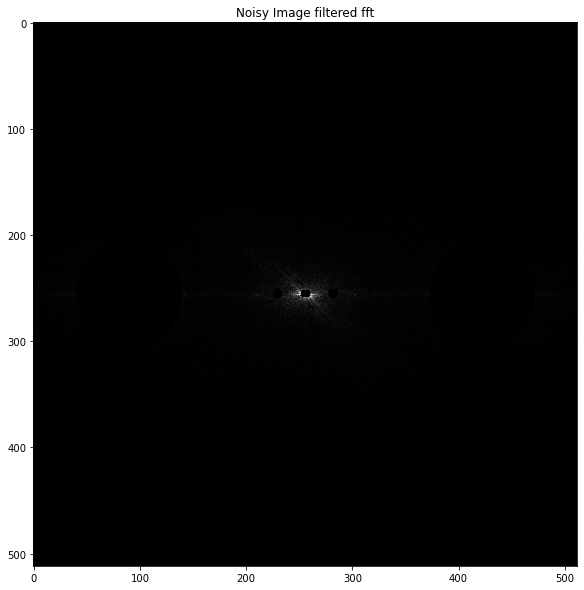

In [510]:
temp3 = filter_circle(TFcircleIN,temp2)
plt.figure(figsize=[10,10])
plt.imshow(abs(temp3),cmap='gray')
plt.title('Noisy Image filtered fft')
plt.show()

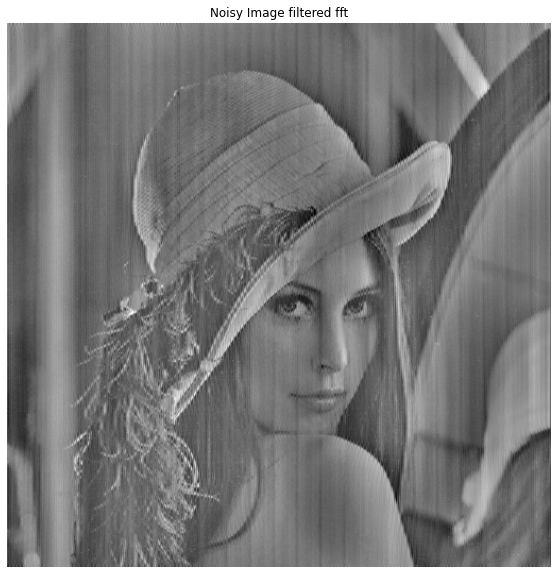

In [511]:
filteredlena=ifft2d(np.fft.fftshift(temp3))
plt.figure(figsize=[10,10])
plt.imshow(filteredlena,cmap='gray')
plt.axis('off')
plt.title('Noisy Image filtered fft')
plt.show()

The main approach followed is to remove the noise points in the fft which are usually the brightest and at higher frequencies 